In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from naca4digit_airfoil import Naca4DigitAirfoil
import pandas as pd
from scipy.interpolate import griddata

In [2]:
airfoil = Naca4DigitAirfoil(c=1, M=2, P=4, T=12, a=0, offset_x=0, offset_y=0)

In [3]:
df = pd.read_csv('NACA2412.txt', delimiter=',')
# df = pd.read_csv('cfd_data.csv', delimiter=',')

In [4]:
df

,nodenumber,x,y,p,pressure-coefficient,dynamic-pressure,absolute-pressure,total-pressure,velocity-magnitude,u,v
0,1,-5.0,-5.0,1.051429,0.007629,137.812121,101326.0514,138.863549,15.000000,15.000000,0.0
1,2,-4.8,-5.0,1.052342,0.007636,137.811274,101326.0523,138.863617,14.999932,14.999932,0.0
2,3,-4.6,-5.0,1.054544,0.007652,137.808967,101326.0545,138.863511,14.999809,14.999809,0.0
3,4,-4.4,-5.0,1.058285,0.007679,137.805221,101326.0583,138.863506,14.999606,14.999606,0.0
4,5,-4.2,-5.0,1.063300,0.007716,137.800220,101326.0633,138.863519,14.999334,14.999334,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20859,20860,14.2,5.0,-0.015662,-0.000114,136.879077,101324.9843,136.863415,14.949115,14.949115,0.0
20860,20861,14.4,5.0,-0.011699,-0.000085,136.875179,101324.9883,136.863479,14.948901,14.948901,0.0
20861,20862,14.6,5.0,-0.007674,-0.000056,136.871315,101324.9923,136.863641,14.948691,14.948691,0.0
20862,20863,14.8,5.0,-0.003757,-0.000027,136.867570,101324.9962,136.863813,14.948492,14.948492,0.0


In [5]:
X, Y = np.meshgrid(np.linspace(df['x'].min(), df['x'].max(), 2000), 
                             np.linspace(df['y'].min(), df['y'].max(), 2000))

In [6]:
U = griddata((df['x'], df['y']), df['u'], (X, Y), method='linear')

In [7]:
# x_min, x_max, y_min, y_max = -0.25, 0.75, -0.25, 0.25
x_min, x_max, y_min, y_max = -5, 15, -5, 5

def set_domain_lims(ax):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def set_zoomed_domain_lims(ax):
    ax.set_xlim(x_min/2, x_max/2)
    ax.set_ylim(y_min/2, y_max/2)

def set_labels(ax):
    ax.set_xlabel('$x \; (m)$')
    ax.set_ylabel('$y \; (m)$')

plt.rcParams['axes.labelsize'] = 20   # Increase the size of labels
plt.rcParams['axes.titlesize'] = 20   # Increase the size of titles
plt.rcParams['xtick.labelsize'] = 15  # Increase the size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 15  # Increase the size of y-axis tick labels

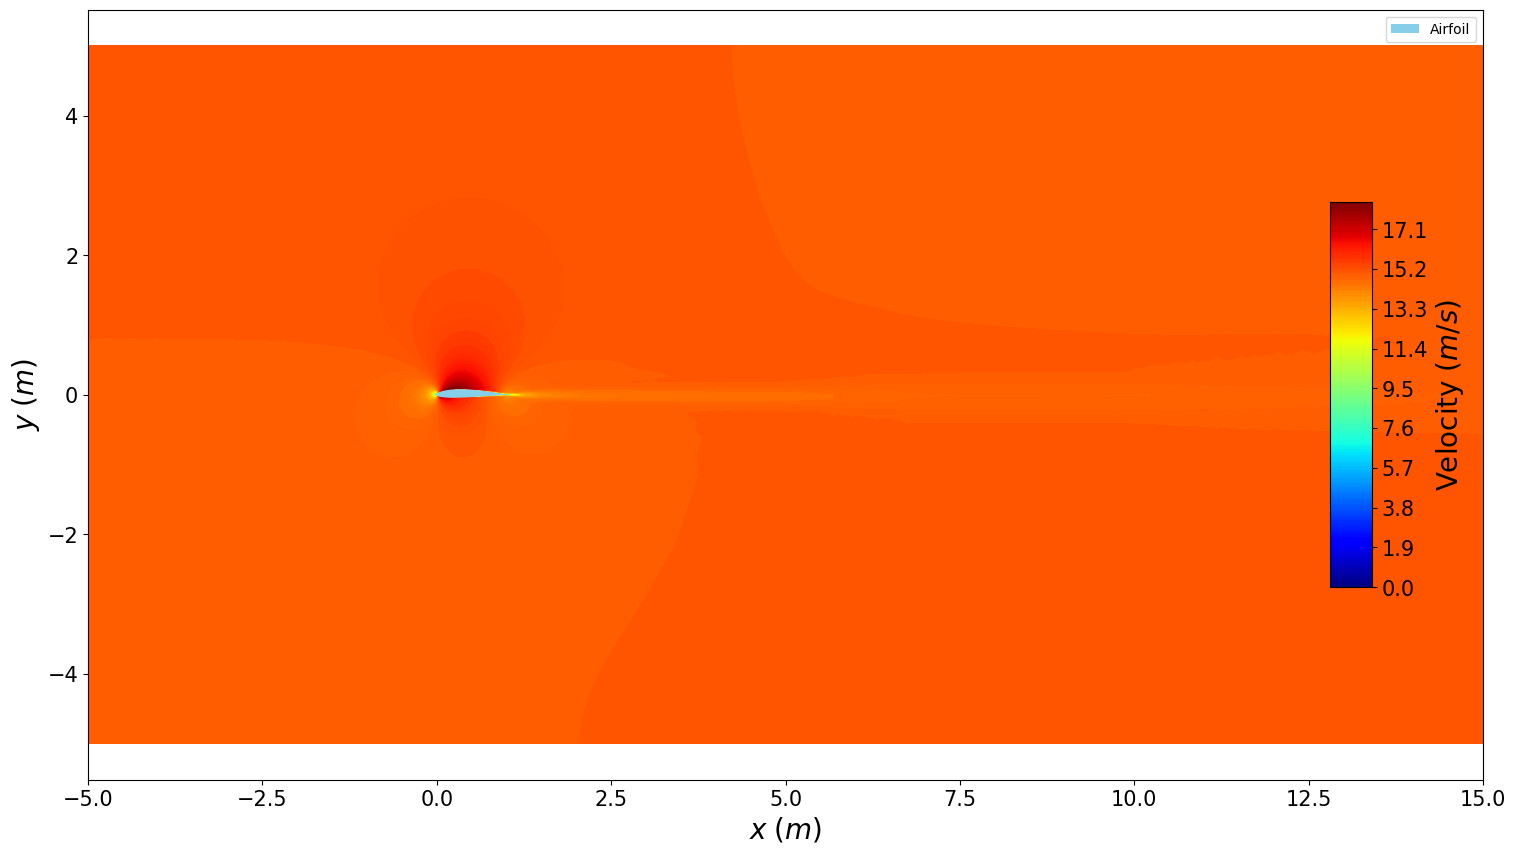

In [8]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(U.min(), U.max(), 0.1)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=8)
# cbar = fig.colorbar(cp, cax=cbaxes, ticks=[i for i in range(int(U.min()), int(U.max()) + 1, 2)])
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity $(m/s)$')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('u.png', dpi=300)
plt.show()

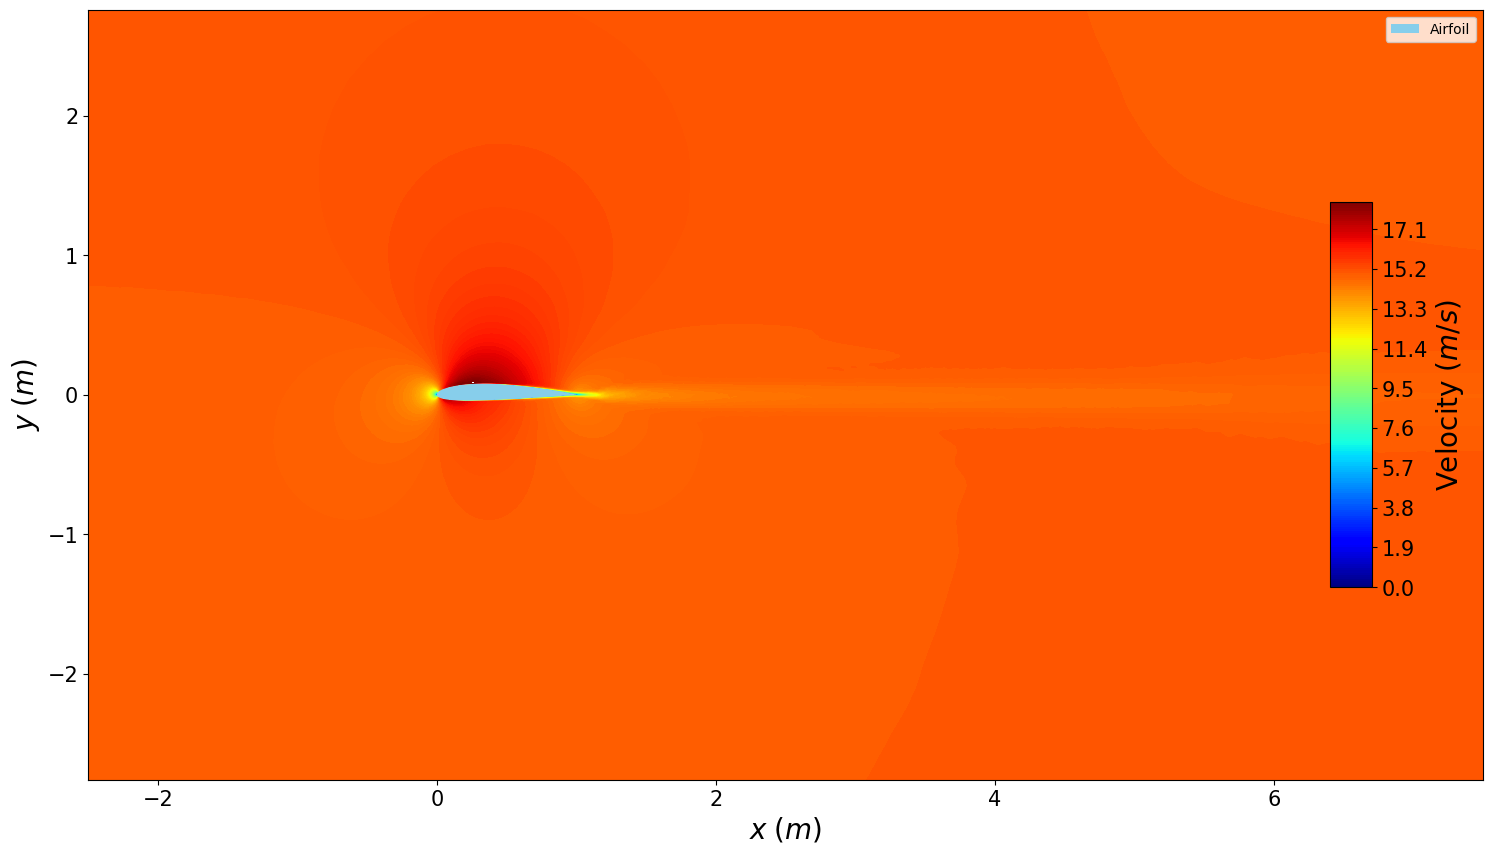

In [9]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(U.min(), U.max(), 0.1)
cp = ax.contourf(X, Y, U, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Velocity Field - X Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=8)
# cbar = fig.colorbar(cp, cax=cbaxes, ticks=[i for i in range(int(U.min()), int(U.max()) + 1, 2)])
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity $(m/s)$')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('u_zoomed.png', dpi=300)
plt.show()

In [10]:
V = griddata((df['x'], df['y']), df['v'], (X, Y), method='linear')

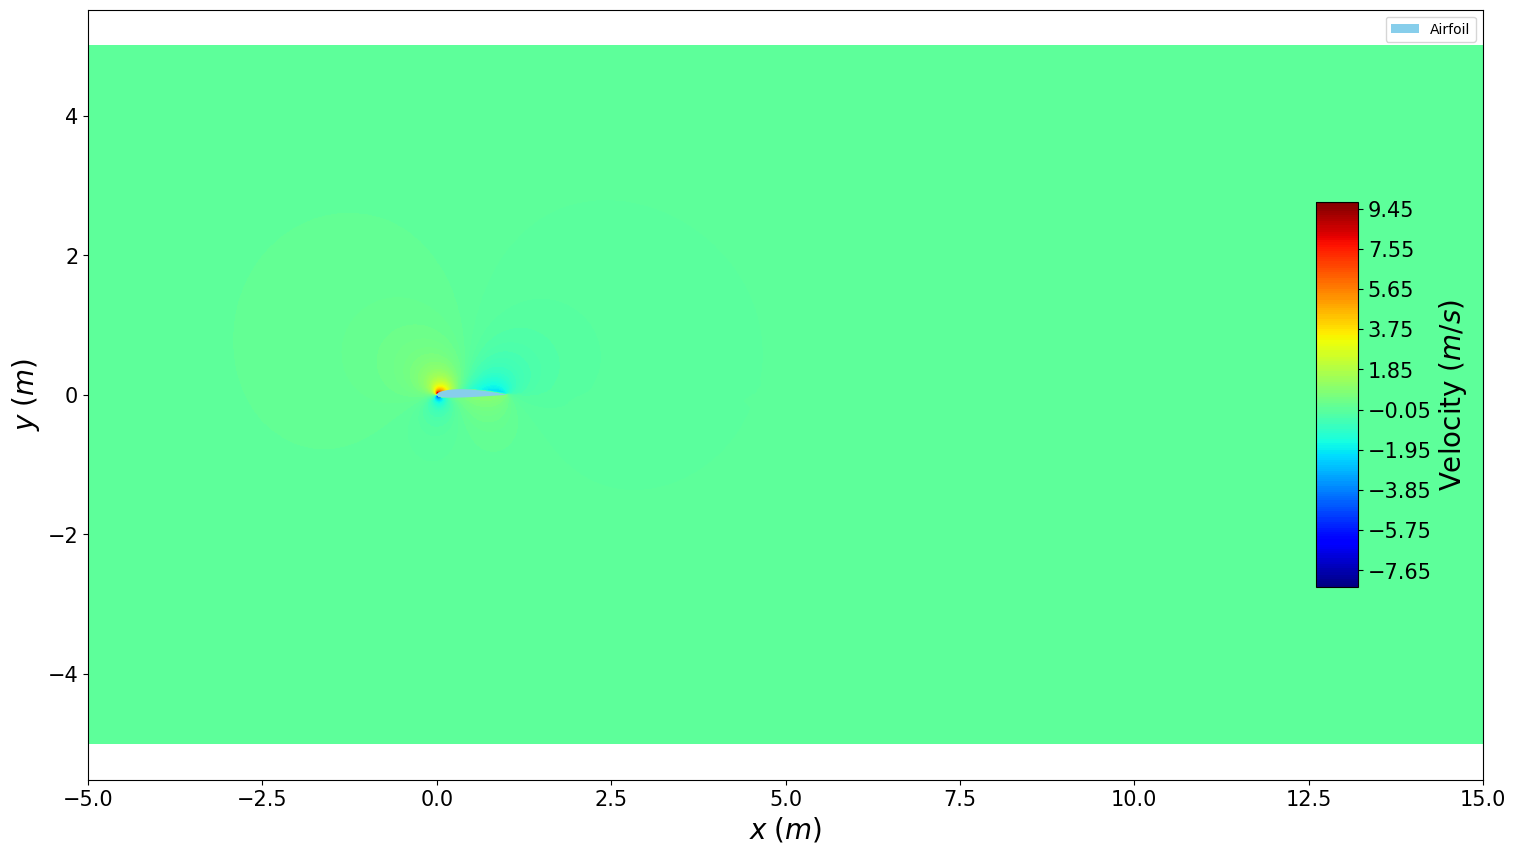

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(V.min(), V.max(), 0.1)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=9)
# cbar = fig.colorbar(cp, cax=cbaxes, ticks=[i for i in range(int(V.min() - 1), int(V.max()) + 1, 2)])
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity $(m/s)$')
set_domain_lims(ax)
ax.grid(False)
plt.savefig('v.png', dpi=300)
plt.show()

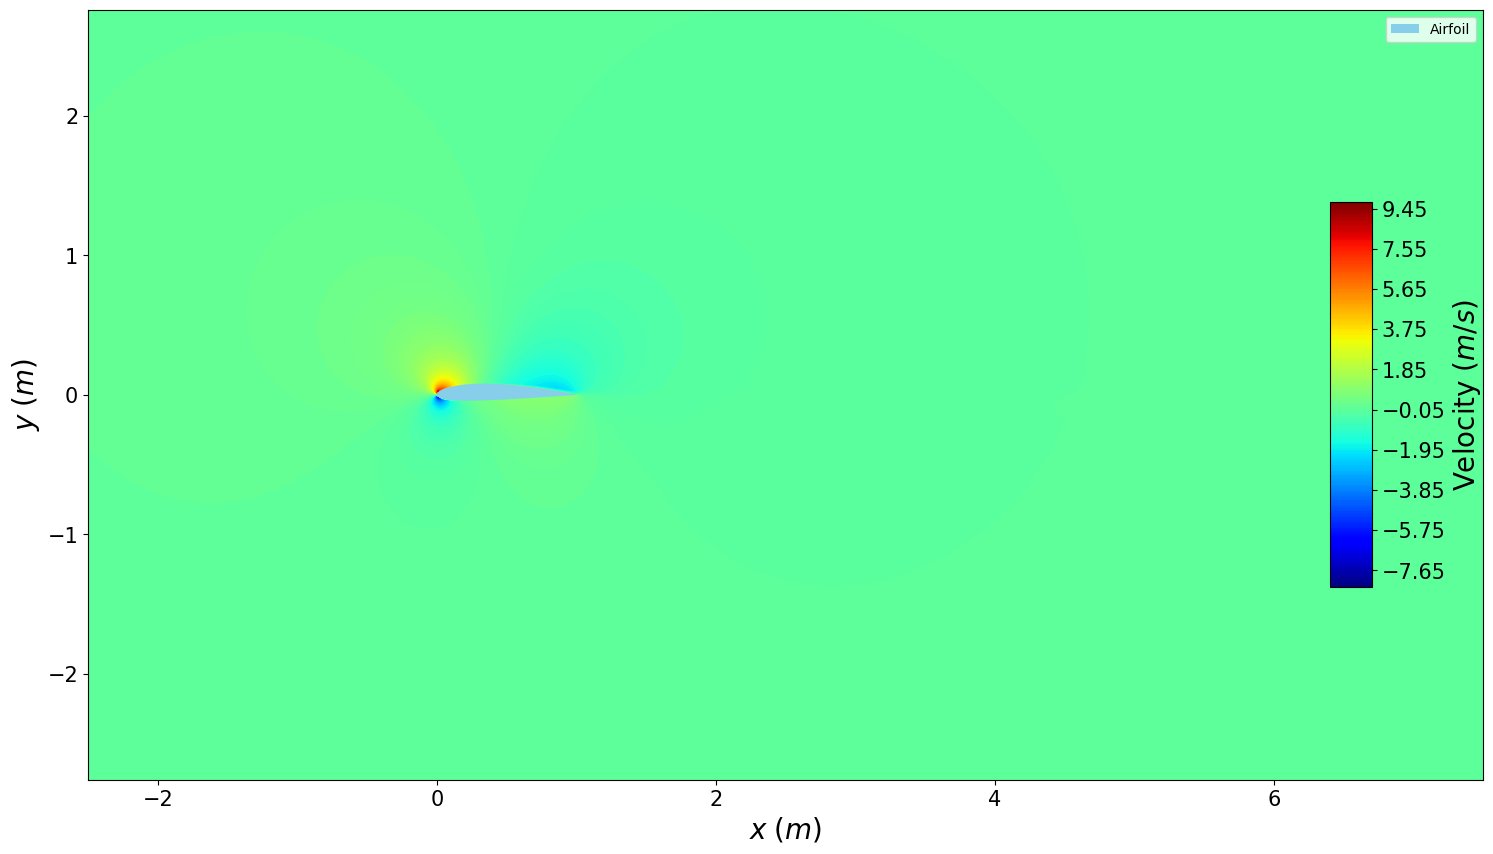

In [12]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(V.min(), V.max(), 0.1)
cp = ax.contourf(X, Y, V, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Velocity Field - Y Component')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=8)
# cbar = fig.colorbar(cp, cax=cbaxes, ticks=[i for i in range(int(V.min() - 1), int(V.max()) + 1, 2)])
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Velocity $(m/s)$')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('v_zoomed.png', dpi=300)
plt.show()

In [13]:
P = griddata((df['x'], df['y']), df['p'], (X, Y), method='linear')

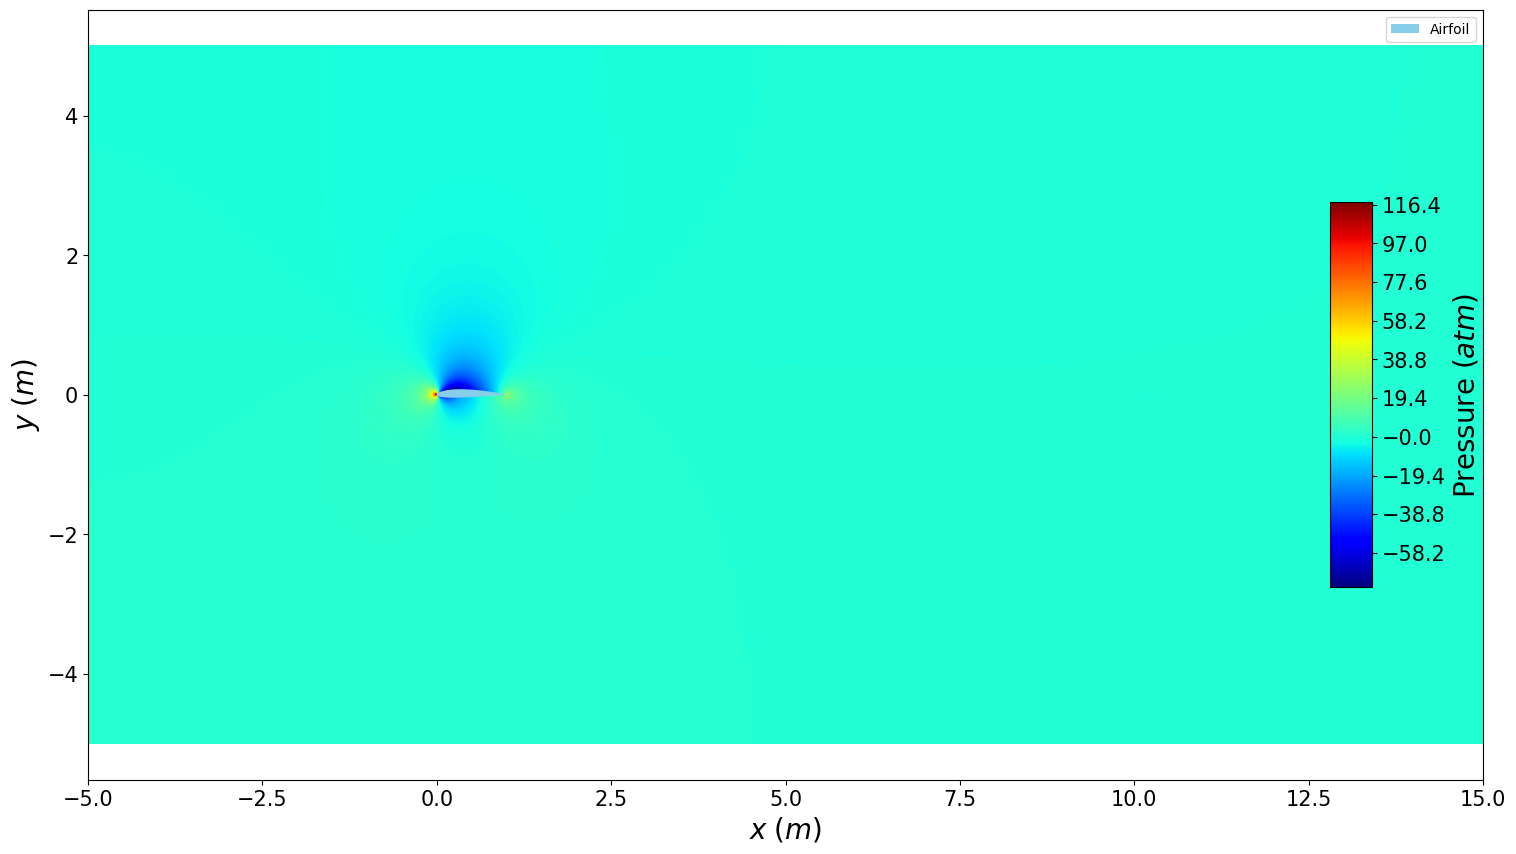

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(P.min(), P.max(), 0.1)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Pressure Field')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=8)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure $(atm)$')
set_domain_lims
ax.grid(False)
plt.savefig('p.png', dpi=300)
plt.show()

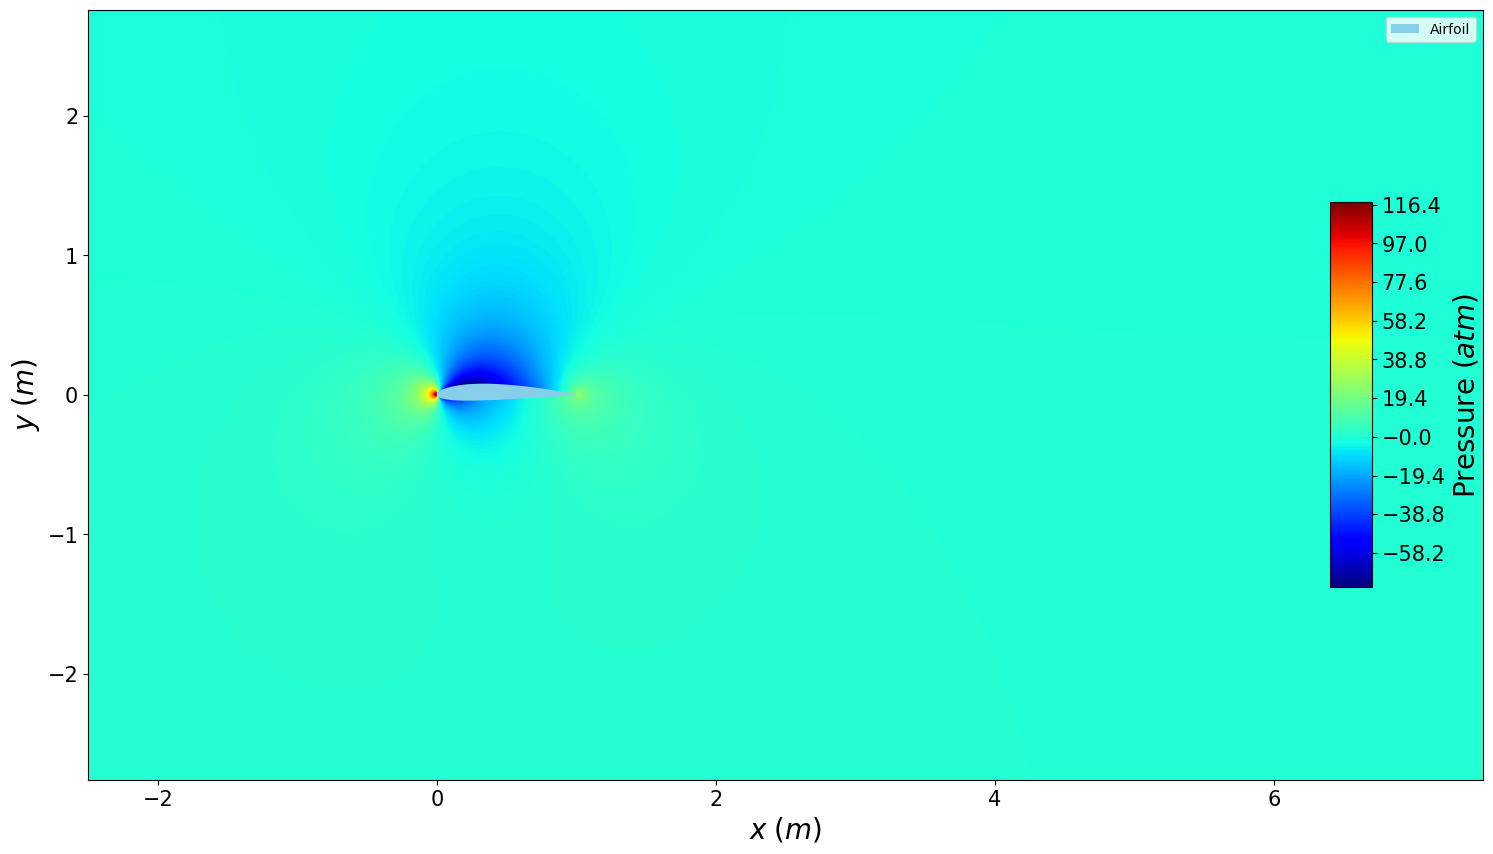

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))

clev = np.arange(P.min(), P.max(), 0.1)
cp = ax.contourf(X, Y, P, clev, cmap='jet')
set_labels(ax)
# ax.set_title('Pressure Field')
airfoil.plot(ax)
cbaxes = inset_axes(ax, width="3%", height="50%", loc='center right', 
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=8)
cbar = fig.colorbar(cp, cax=cbaxes)
cbar.set_label('Pressure $(atm)$')
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('p_zoomed.png', dpi=300)
plt.show()

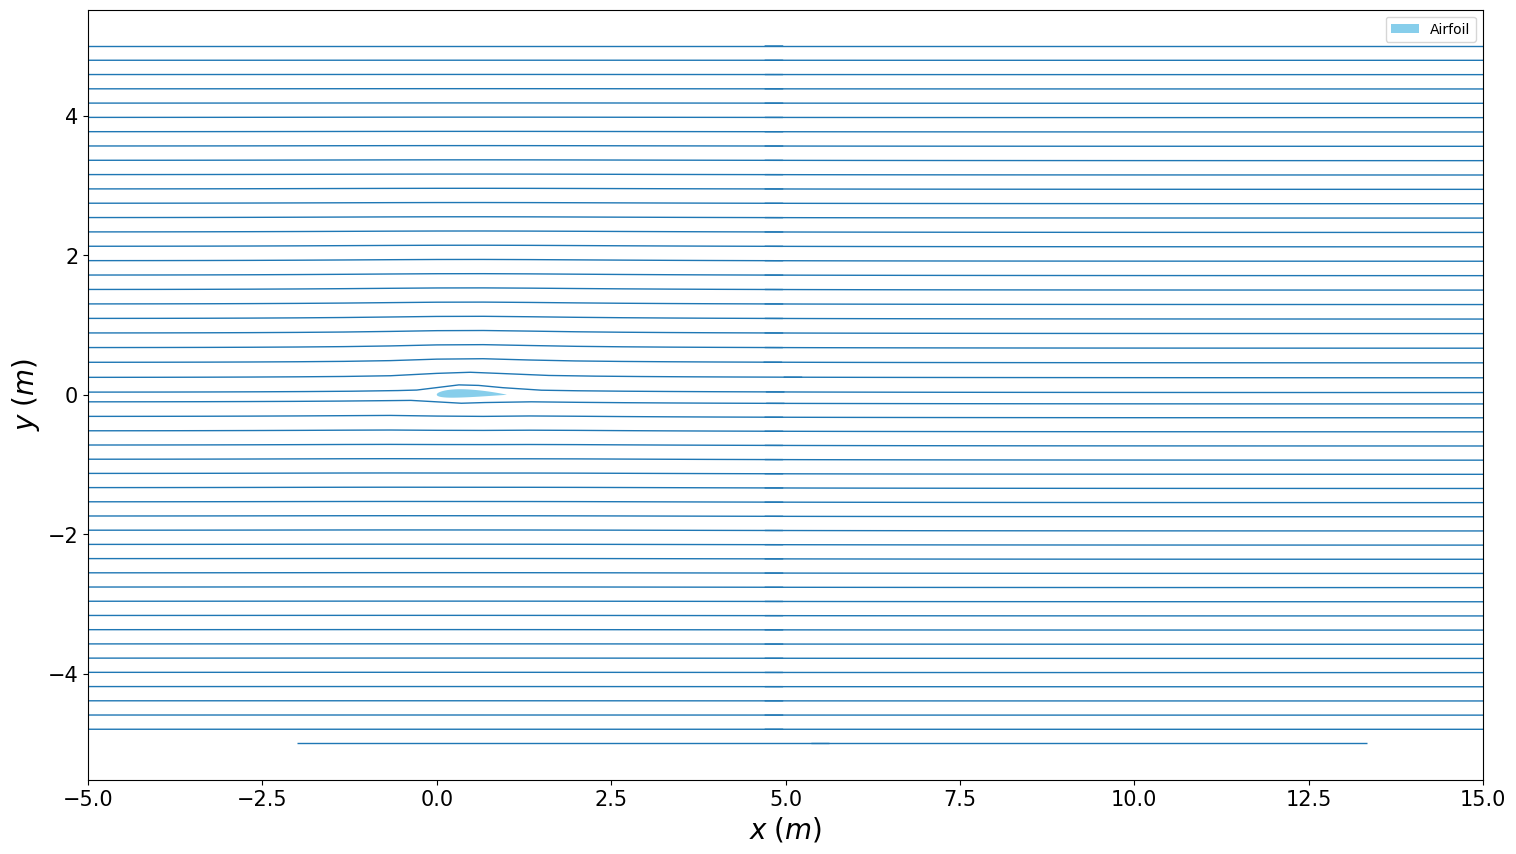

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))
num_points = 50
y_start = y_min
y_end = y_max
start_points = np.zeros((num_points, 2))
start_points[:, 1] = np.linspace(y_start, y_end, num_points)
start_points[:, 0] = 0
ax.streamplot(X, Y, U, V, start_points=start_points, linewidth=1, arrowsize=1, arrowstyle='-', broken_streamlines=False)
set_labels(ax)
# ax.set_title('Flow Streamlines')
airfoil.plot(ax)
set_domain_lims(ax)
ax.grid(False)
plt.savefig('flow.png', dpi=300)
plt.show()

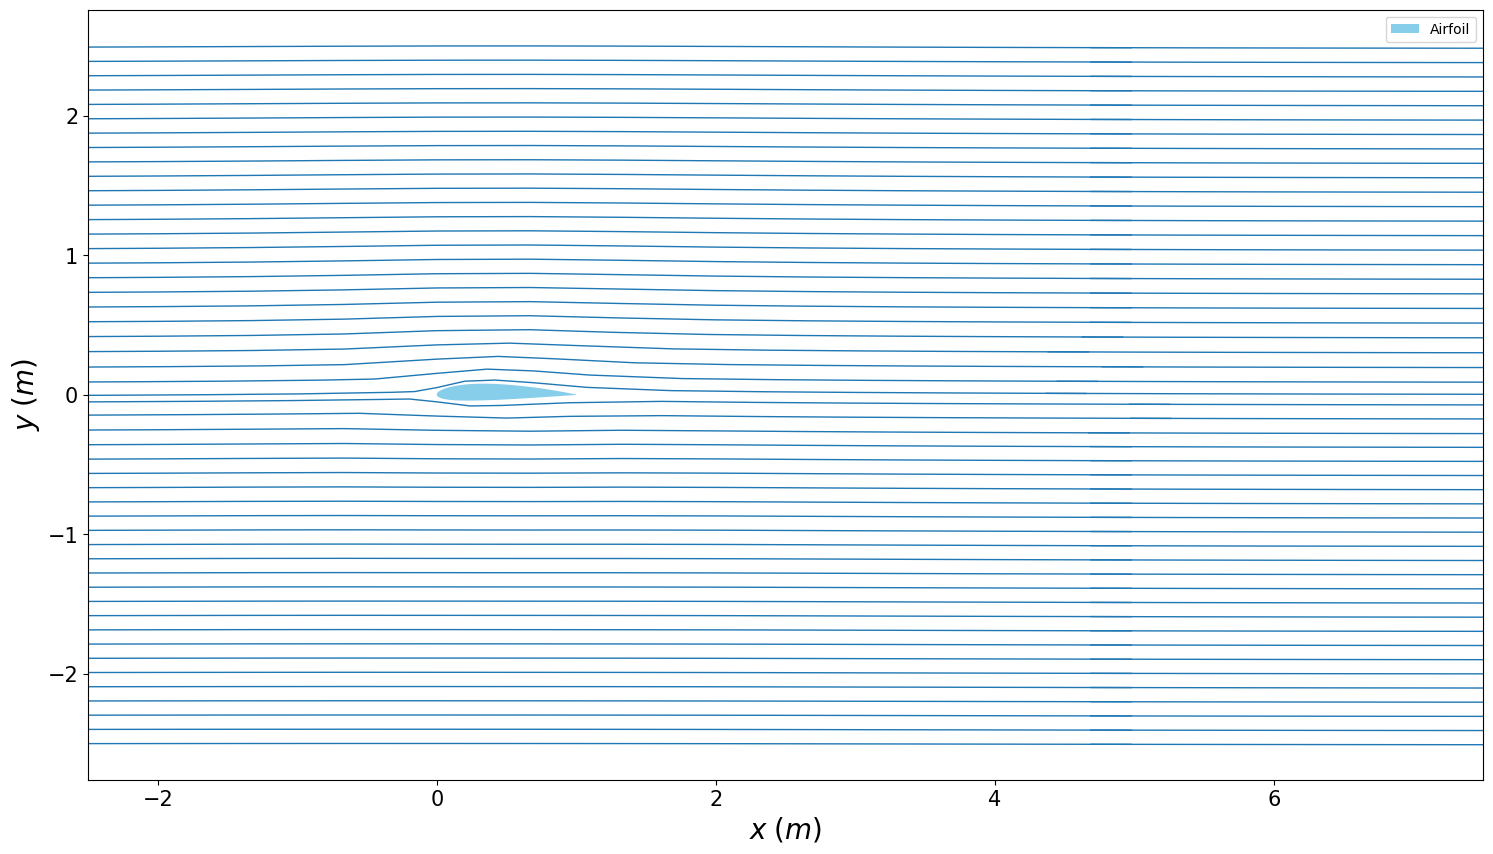

In [17]:
fig, ax = plt.subplots(figsize=(18, 10))
num_points = 50
y_start = y_min/2
y_end = y_max/2
start_points = np.zeros((num_points, 2))
start_points[:, 1] = np.linspace(y_start, y_end, num_points)
start_points[:, 0] = 0
ax.streamplot(X, Y, U, V, start_points=start_points, linewidth=1, arrowsize=1, arrowstyle='-', broken_streamlines=False)
set_labels(ax)
# ax.set_title('Flow Streamlines')
airfoil.plot(ax)
set_zoomed_domain_lims(ax)
ax.grid(False)
plt.savefig('flow_zoomed.png', dpi=300)
plt.show()